## 单变量线性回归

### 案例：假设你是一家餐厅的CEO，正在考虑开一家分店，根据该城市的人口数据预测其利润

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/mac/Desktop/ml/ex1data1.txt'
data = pd.read_csv(path, header = None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


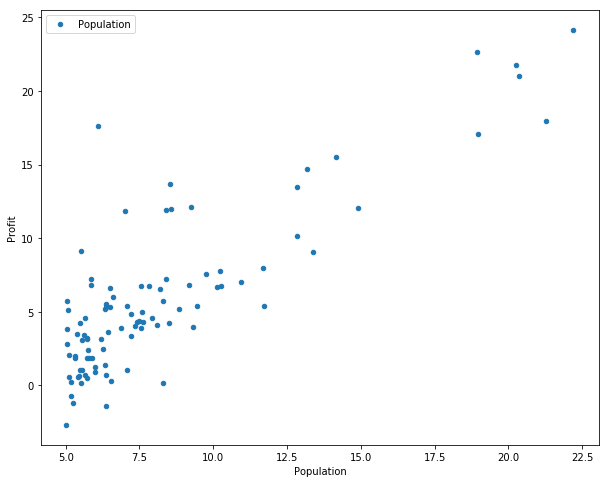

In [4]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize=(10,8), label='Population')
plt.show()

### 数据集准备

In [5]:
data.insert(0, 'ones', 1) #插入一列
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


取切片0:-1不太理解

In [6]:
X = data.iloc[:,0:-1]
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


取最后一列

In [7]:
y = data.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [8]:
X = X.values #将dataflame转成values
X.shape

(97, 2)

In [9]:
y = y.values #将dataflame转成values
y.shape

(97,)

In [10]:
y = y.reshape(97,1)
y.shape

(97, 1)

 ### 计算损失函数
$$J\left( \theta \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$


In [12]:
theta = np.zeros((2, 1)) #初始化2*1的零矩阵
print (theta)

[[0.]
 [0.]]


In [16]:
type (X @ theta - y) #查看数据类型

numpy.ndarray

In [15]:
print (X @ theta - y)

[[-17.592  ]
 [ -9.1302 ]
 [-13.662  ]
 [-11.854  ]
 [ -6.8233 ]
 [-11.886  ]
 [ -4.3483 ]
 [-12.     ]
 [ -6.5987 ]
 [ -3.8166 ]
 [ -3.2522 ]
 [-15.505  ]
 [ -3.1551 ]
 [ -7.2258 ]
 [ -0.71618]
 [ -3.5129 ]
 [ -5.3048 ]
 [ -0.56077]
 [ -3.6518 ]
 [ -5.3893 ]
 [ -3.1386 ]
 [-21.767  ]
 [ -4.263  ]
 [ -5.1875 ]
 [ -3.0825 ]
 [-22.638  ]
 [-13.501  ]
 [ -7.0467 ]
 [-14.692  ]
 [-24.147  ]
 [  1.22   ]
 [ -5.9966 ]
 [-12.134  ]
 [ -1.8495 ]
 [ -6.5426 ]
 [ -4.5623 ]
 [ -4.1164 ]
 [ -3.3928 ]
 [-10.117  ]
 [ -5.4974 ]
 [ -0.55657]
 [ -3.9115 ]
 [ -5.3854 ]
 [ -2.4406 ]
 [ -6.7318 ]
 [ -1.0463 ]
 [ -5.1337 ]
 [ -1.844  ]
 [ -8.0043 ]
 [ -1.0179 ]
 [ -6.7504 ]
 [ -1.8396 ]
 [ -4.2885 ]
 [ -4.9981 ]
 [ -1.4233 ]
 [  1.4211 ]
 [ -2.4756 ]
 [ -4.6042 ]
 [ -3.9624 ]
 [ -5.4141 ]
 [ -5.1694 ]
 [  0.74279]
 [-17.929  ]
 [-12.054  ]
 [-17.054  ]
 [ -4.8852 ]
 [ -5.7442 ]
 [ -7.7754 ]
 [ -1.0173 ]
 [-20.992  ]
 [ -6.6799 ]
 [ -4.0259 ]
 [ -1.2784 ]
 [ -3.3411 ]
 [  2.6807 ]
 [ -0.29678]
 [ -3.8845 ]

In [18]:
tmp = np.sum(X @ theta - y) #np对数组元素进行操作

In [19]:
print (tmp)

-566.3961


In [20]:
def costFunc(X, y, theta):
    inner = np.power((X @ theta - y), 2)
    return np.sum(inner) / (2 * len(X)) #len(X)为X的行数

In [21]:
costInit = costFunc(X, y, theta)
print (costInit)

32.072733877455676


### 梯度下降函数

In [22]:
def grandientDescent(X, y, theta, alpha, iters):
    costs = [] #用于保存每次迭代的cost值
    for i in range(iters):
        hx = X @ theta - y
        theta = theta - (X.T @ hx) * alpha / len(X) #X.T为矩阵的转置
        cost = costFunc(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0 : print(cost)
    return theta, costs

In [23]:
alpha = 0.02
iters = 2000
theta, costs = grandientDescent(X, y, theta, alpha, iters)

16.769642371667455
5.17066809230326
4.813840215803054
4.640559602034057
4.556412109403549
4.515548908598864
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705422
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791015
4.476974597934661
4.476972940603823


### 可视化损失函数

AttributeError: 'tuple' object has no attribute 'plot'

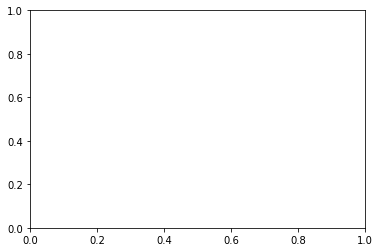

In [32]:
ax = plt.subplots()
ax.plot(np.arange(iters), costs, 'b')

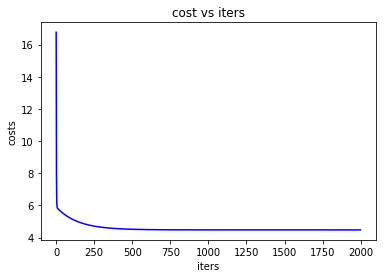

In [36]:
fig,ax = plt.subplots() #fig为图像 ax为实例
ax.plot(np.arange(iters), costs, 'b')
ax.set(xlabel='iters', ylabel='costs', title='cost vs iters')
plt.show() #画图

### 拟合函数可视化

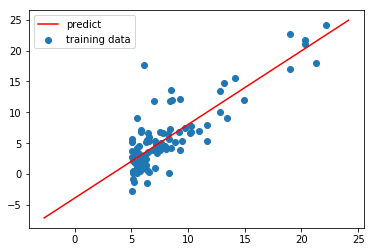

In [43]:
#x = np.linspace(0, 30, 100)
x = np.linspace(y.min(), y.max(), 100)
y_ = theta[0,0] + theta[1,0] * x

fig,ax = plt.subplots()
ax.scatter(X[:,1], y, label = 'training data')
ax.plot(x, y_, 'r', label = 'predict')
ax.legend() #标签生效
plt.show()